In [112]:
# imports...
import pandas as pd
import numpy as np
import os
from scipy import stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")
# acquire
from env import host, user, password
from pydataset import data
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
# my fancy docs
import acquire
import prepare
import explore

In [ ]:
# need to convert

## Exercises
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [2]:
# positive: survives
# negative: dies
# TP: predict survival, and the passenger actually survived
# TN: predict death, and passenger actually died
# FN: predict death, but passenger actually survived
# FP: predict survival, but passenger actually died

In [3]:
# lets bring in the data set
# titanic_df = acquire.new_titanic_data()
# now let's prep it
train, validate, test = prepare.prep_titanic_data(acquire.new_titanic_data(), column = 'age', method = 'median', dummies = ['embarked', 'sex'])
# split it
# train, validate, test = prepare.titanic_split(titanic_df)
# what do they look like?
train.shape, validate.shape, test.shape

((498, 11), (214, 11), (179, 11))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  498 non-null    int64  
 1   survived      498 non-null    int64  
 2   pclass        498 non-null    int64  
 3   age           498 non-null    float64
 4   sibsp         498 non-null    int64  
 5   parch         498 non-null    int64  
 6   fare          498 non-null    float64
 7   alone         498 non-null    int64  
 8   embarked_Q    498 non-null    uint8  
 9   embarked_S    498 non-null    uint8  
 10  sex_male      498 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 36.5 KB


In [5]:
# i want to see relationships between each column and 'survived'
# 'pclass' - chi2

observed1 = pd.crosstab(train.survived, train.pclass)
chi2, p, degf, expected = stats.chi2_contingency(observed1)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 55.2252
p     = 0.0000


In [6]:
# i want to see relationships between each column and 'survived'
# 'sibsp' - chi2

observed2 = pd.crosstab(train.survived, train.sibsp)
chi2, p, degf, expected = stats.chi2_contingency(observed2)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 24.8926
p     = 0.0004


In [7]:
# i want to see relationships between each column and 'survived'
# 'sibsp' - chi2

observed2 = pd.crosstab(train.survived, train.sibsp)
chi2, p, degf, expected = stats.chi2_contingency(observed2)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 24.8926
p     = 0.0004


In [8]:
# i want to see relationships between each column and 'survived'
# 'parch' - chi2

observed3 = pd.crosstab(train.survived, train.parch)
chi2, p, degf, expected = stats.chi2_contingency(observed3)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 15.4412
p     = 0.0086


In [9]:
# i want to see relationships between each column and 'survived'
# 'alone' - chi2

observed4 = pd.crosstab(train.survived, train.alone)
chi2, p, degf, expected = stats.chi2_contingency(observed4)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 18.1920
p     = 0.0000


In [10]:
# i want to see relationships between each column and 'survived'
# 'embarked_Q' - chi2

observed5 = pd.crosstab(train.survived, train.embarked_Q)
chi2, p, degf, expected = stats.chi2_contingency(observed5)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 0.3542
p     = 0.5517


In [11]:
# i want to see relationships between each column and 'survived'
# 'embarked_S' - chi2

observed6 = pd.crosstab(train.survived, train.embarked_S)
chi2, p, degf, expected = stats.chi2_contingency(observed6)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 12.3251
p     = 0.0004


In [12]:
# i want to see relationships between each column and 'survived'
# 'sex_male' - chi2

observed7 = pd.crosstab(train.survived, train.sex_male)
chi2, p, degf, expected = stats.chi2_contingency(observed7)
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

chi^2 = 159.2890
p     = 0.0000


In [13]:
# now the continuous...
# 'age'
# 'fare'

# create survival_rate
survival_rate = train['survived'].mean()
survival_rate

0.38353413654618473

In [14]:
# create age variable for ttest
age = train['age']

In [15]:
# ttest for age
alpha = 0.01
t, p = stats.ttest_1samp(age, survival_rate)
t, p/2, alpha

(49.391473076033655, 3.8085496775045816e-194, 0.01)

In [16]:
# create fare variable for ttest
fare = train['fare']

In [17]:
# ttest for fare
alpha = 0.01
t, p = stats.ttest_1samp(fare, survival_rate)
t, p/2, alpha

(14.548430746098049, 1.6753909571183626e-40, 0.01)

In [18]:
# so which columns do I want to keep for my model?????
# 'sex_male', 'pclass', 'age', 'sibsp'
# and maybe 'alone'

In [19]:
X_cols = ['sex_male', 'pclass', 'age', 'sibsp']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [20]:
# X_train is the DF w/o the 'survived' column
# y_train is the 'survived' column as a Series

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [21]:
# what is the mode of 'survived'?
y_train.value_counts()
# death wins

0    307
1    191
Name: survived, dtype: int64

In [22]:
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.6165


2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [23]:
# let's look w/ default hyperparameters
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# how does the DT perform w/ default hyperparameters?
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 91.57%
validate score: 77.10%


In [26]:
# what does the tree look like?
print(export_text(tree, feature_names=X_train.columns.tolist(), show_weights=True))

|--- sex_male <= 0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 3.00
|   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |--- age >  3.00
|   |   |   |--- age <= 23.50
|   |   |   |   |--- weights: [0.00, 26.00] class: 1
|   |   |   |--- age >  23.50
|   |   |   |   |--- age <= 27.50
|   |   |   |   |   |--- age <= 26.50
|   |   |   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |   |   |--- pclass <= 1.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |   |   |   |--- pclass >  1.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |   |   |   |--- sibsp >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |--- age >  26.50
|   |   |   |   |   |   |--- weights: [1.00, 1.00] class: 0
|   |   |   |   |--- age >  27.50
|   |   |   |   |   |--- age <= 48.50
|   |   |   |   |   |   |--- weights: [0.00, 43.00] class: 1
|   |   |   |   |   |--- age >  48.50
|   |   |   |   |   

[Text(190.06732069672134, 476.36526315789473, 'X[0] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(86.53573770491803, 450.61578947368423, 'X[1] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(32.199344262295085, 424.8663157894737, 'X[2] <= 3.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(24.149508196721314, 399.1168421052632, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(40.24918032786886, 399.1168421052632, 'X[2] <= 23.5\ngini = 0.062\nsamples = 93\nvalue = [3, 90]'),
 Text(32.199344262295085, 373.3673684210526, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(48.29901639344263, 373.3673684210526, 'X[2] <= 27.5\ngini = 0.086\nsamples = 67\nvalue = [3, 64]'),
 Text(32.199344262295085, 347.6178947368421, 'X[2] <= 26.5\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(24.149508196721314, 321.86842105263156, 'X[3] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(16.099672131147543, 296.11894736842106, 'X[1] <= 1.5\ngini = 0.32

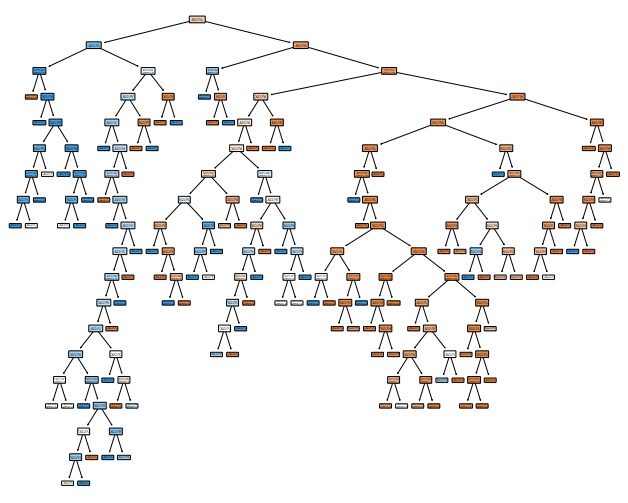

In [27]:
# this is garbage

plot_tree(tree, filled=True, rounded=True)

In [28]:
# now let's dive in and take a close look once we add some hyperparameters



In [88]:
tree1 = DecisionTreeClassifier(max_leaf_nodes=4)
tree1.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

In [89]:
print(f'training score: {tree1.score(X_train, y_train):.2%}')
print(f'validate score: {tree1.score(X_validate, y_validate):.2%}')

training score: 80.72%
validate score: 77.57%


[Text(306.90000000000003, 407.7, 'X[0] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(153.45000000000002, 244.62, 'X[1] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(76.72500000000001, 81.53999999999996, 'gini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(230.175, 81.53999999999996, 'gini = 0.498\nsamples = 81\nvalue = [38, 43]'),
 Text(460.35, 244.62, 'X[2] <= 3.5\ngini = 0.295\nsamples = 323\nvalue = [265, 58]'),
 Text(383.62500000000006, 81.53999999999996, 'gini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(537.075, 81.53999999999996, 'gini = 0.27\nsamples = 311\nvalue = [261, 50]')]

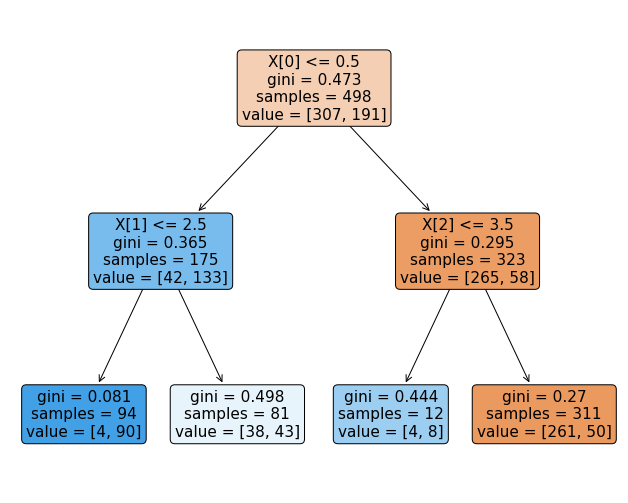

In [90]:
plot_tree(tree1, filled=True, rounded=True)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [93]:
print(f'Tree 1 training score: {tree1.score(X_train, y_train):.2%}')
print(f'Tree 1 validate score: {tree1.score(X_validate, y_validate):.2%}')

Tree 1 training score: 80.72%
Tree 1 validate score: 77.57%


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [148]:
# let's add the predictions to the df

train['prediction'] = tree1.predict(X_train)
train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone,embarked_Q,embarked_S,sex_male,prediction
583,583,0,1,36.0,0,0,40.1250,1,0,0,1,0
165,165,1,3,9.0,0,2,20.5250,0,0,1,1,0
50,50,0,3,7.0,4,1,39.6875,0,0,1,1,0
259,259,1,2,50.0,0,1,26.0000,0,0,1,0,1
306,306,1,1,28.0,0,0,110.8833,1,0,0,0,1


In [150]:
# confusion matrix
confusion_matrix(train.survived, train.prediction)

array([[261,  46],
       [ 50, 141]])

In [151]:
train['survived'].value_counts()

0    307
1    191
Name: survived, dtype: int64

In [118]:
train.prediction.value_counts()

0    311
1    187
Name: prediction, dtype: int64

In [154]:
pd.DataFrame(confusion_matrix(train.survived, train.prediction), index=['actual death', 'actual survived'], columns=['pred death', 'pred survived'] )


                

,pred death,pred survived
actual death,261,46
actual survived,50,141


In [135]:
tp = 141
tn = 261
fp = 46
fn = 50
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)

In [144]:
# accuracy
accuracy_1 = (train.survived == train.prediction).mean()
# Precision
subset = train[train.prediction == 1]
precision_t1 = (subset.prediction == subset.survived).mean()
# Recall
subset = train[train.survived == 1]
recall_t1 = (subset.prediction == subset.survived).mean()
# f1-score


class_report = pd.DataFrame(classification_report(train.survived, train.prediction, output_dict=True))

In [145]:
print(f'The overall Accuracy is {accuracy_1:.2%}')
print(f'The True Positive rate is {tpr:.2%}')
print(f'The False Positive rate is {fpr:.2%}')
print(f'The True Negative rate is {tnr:.2%}')
print(f'The False Negative rate is {fnr:.2%}')
print(f'Precision for tree 1 is {precision_t1:.2%}')
print(f'Recall for tree 1 is {recall_t1:.2%}')

The overall Accuracy is 80.72%
The True Positive rate is 73.82%
The False Positive rate is 14.98%
The True Negative rate is 85.02%
The False Negative rate is 26.18%
Precision for tree 1 is 75.40%
Recall for tree 1 is 73.82%


In [147]:
class_report



,0,1,accuracy,macro avg,weighted avg
precision,0.839228,0.754011,0.807229,0.796619,0.806544
recall,0.850163,0.738220,0.807229,0.794191,0.807229
f1-score,0.844660,0.746032,0.807229,0.795346,0.806833
support,307.000000,191.000000,0.807229,498.000000,498.000000


5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?